<a href="https://colab.research.google.com/github/Nimere1990/Text-to-Speech/blob/main/%D0%95%D1%80%D1%91%D0%BC%D0%B8%D0%BD_%D0%98_%D0%95_%2250_4_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Голосовой помощник с TTS (Text-to-Speech)**

**Задание:**

**Реализовать систему, которая:**

1. Распознает речевые команды из заданного списка (минимум 10 команд, язык можно выбрать по желанию).
2. Генерирует текстовые ответы с использованием языковой модели.
3. Преобразует текстовые ответы в речь с использованием TTS-модели (например, Google TTS или Hugging Face TTS).

**Критерии оценки:**

1. Точность распознавания команд > 90%.
2. Время отклика < 5 секунд.
3. Качество синтезированной речи (естественность, интонация).
4. Поддержка контекста диалога.

In [ ]:
# Установка необходимых библиотек
!pip install gtts librosa matplotlib SpeechRecognition transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 10.9 MB/s eta 0:00:00


In [ ]:
import zipfile  # Импорт модуля для работы с ZIP-архивами
import os  # Импорт модуля для работы с файловой системой
import IPython.display as ipd  # Импорт для вывода аудиофайлов в Jupyter
import librosa  # Импорт библиотеки для анализа аудио
import librosa.display  # Импорт для визуализации аудио
import matplotlib.pyplot as plt  # Импорт для построения графиков
import numpy as np  # Импорт библиотеки для работы с массивами
from gtts import gTTS  # Импорт для синтеза речи
import speech_recognition as sr  # Импорт библиотеки для распознавания речи
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer  # Импорт для работы с моделями трансформеров

In [ ]:
# Загрузка ZIP-архива с аудиофайлами
from google.colab import files  # Импорт для загрузки файлов
uploaded = files.upload()  # Открывает окно выбора файла для загрузки

# Распаковка загруженного ZIP-архива
zip_file_name = list(uploaded.keys())[0]  # Получение имени загруженного файла
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:  # Открытие ZIP-архива
    zip_ref.extractall("audio_commands")  # Распаковка в папку "audio_commands"

Saving запросы.zip to запросы.zip


In [ ]:
# Загрузка модели и токенизатора
model_name = "sberbank-ai/rugpt3small_based_on_gpt2"  # Название модели
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Загрузка токенизатора для модели
model = AutoModelForCausalLM.from_pretrained(model_name)  # Загрузка самой модели
text_generation_model = pipeline("text-generation", model=model, tokenizer=tokenizer)  # Создание пайплайна для генерации текста

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Функция для синтеза речи из текста
def text_to_speech(text):
    tts = gTTS(text=text, lang='ru')  # Создание объекта синтеза речи с указанным текстом
    tts.save("response.mp3")  # Сохранение синтезированного аудио в файл
    return "response.mp3"  # Возврат имени сохраненного файла

# Функция для отображения спектрограммы
def plot_spectrogram(file_path):
    y, sr = librosa.load(file_path)  # Загрузка аудиофайла
    plt.figure(figsize=(10, 4))  # Установка размера графика
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  # Преобразование амплитуд в децибелы
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')  # Визуализация спектрограммы
    plt.colorbar(format='%+2.0f dB')  # Добавление цветовой шкалы
    plt.title('Спектрограмма')  # Установка заголовка графика
    plt.show()  # Отображение графика

# Функция для распознавания речи из аудиофайла
def recognize_speech_from_audio(audio_file):
    r = sr.Recognizer()  # Создание объекта распознавания речи
    with sr.AudioFile(audio_file) as source:  # Открытие аудиофайла
        audio = r.record(source)  # Чтение аудиофайла
        try:
            command = r.recognize_google(audio, language='ru-RU')  # Распознавание речи с помощью Google API
            print(f"Распознанная команда: {command}")  # Вывод распознанной команды
            return command  # Возврат распознанной команды
        except sr.UnknownValueError:
            print("Не удалось распознать речь")  # Обработка ошибки, если речь не распознана
            return None  # Возврат None
        except sr.RequestError:
            print("Ошибка API")  # Обработка ошибки, если есть проблемы с API
            return None  # Возврат None

# Список файлов с заранее записанными звуковыми командами
audio_files = [f"audio_commands/{f}" for f in os.listdir("audio_commands") if f.endswith('.wav') or f.endswith('.mp3')]  # Создание списка аудиофайлов

Обрабатывается файл: audio_commands/04.wav


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Распознанная команда: Скажи какой тебе нравится цвет
Сгенерированный ответ: Вопрос: Скажи какой тебе нравится цвет
Ответ: Белый
Проигрывание сгенерированного голоса...


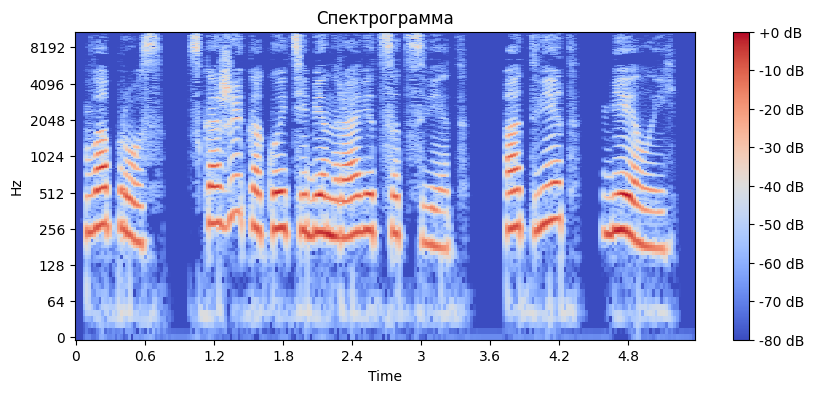

Обрабатывается файл: audio_commands/08.wav
Распознанная команда: Какой сейчас год
Сгенерированный ответ: Вопрос: Какой сейчас год
Ответ: 2015
Проигрывание сгенерированного голоса...


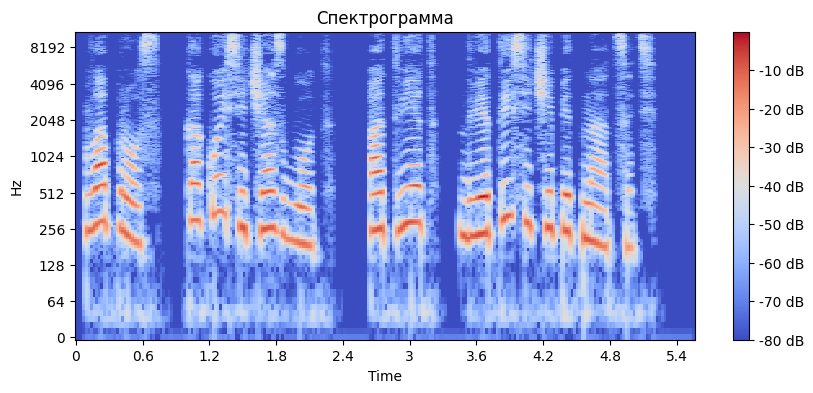

Обрабатывается файл: audio_commands/07.wav
Распознанная команда: Что будет если налёт посыпать соль
Сгенерированный ответ: Вопрос: Что будет если налёт посыпать соль
Ответ: Соль будет.

Вопрос: Что будет если налёт посыпать соль
Ответ: Соль будет.

Вопрос: Что будет если налёт посыпать соль
Ответ: Соль
Проигрывание сгенерированного голоса...


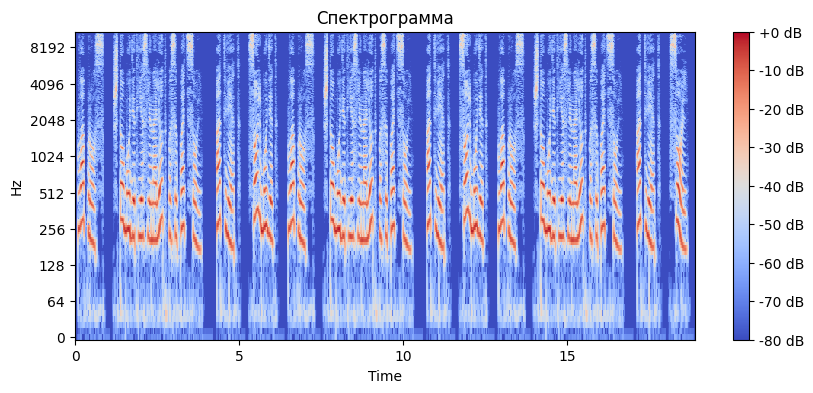

Обрабатывается файл: audio_commands/09.wav
Распознанная команда: Почему небо голубое
Сгенерированный ответ: Вопрос: Почему небо голубое
Ответ: Потому что небо голубое.
Проигрывание сгенерированного голоса...


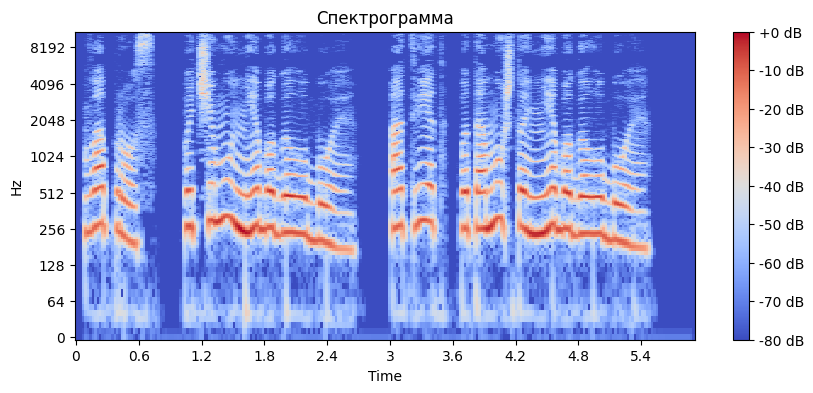

Обрабатывается файл: audio_commands/03.wav
Распознанная команда: Ты знаешь кто такой Александр Сергеевич Пушкин
Сгенерированный ответ: Вопрос: Ты знаешь кто такой Александр Сергеевич Пушкин
Ответ: Александр Сергеевич Пушкин - это один из самых известных и любимых поэтов России.
Проигрывание сгенерированного голоса...


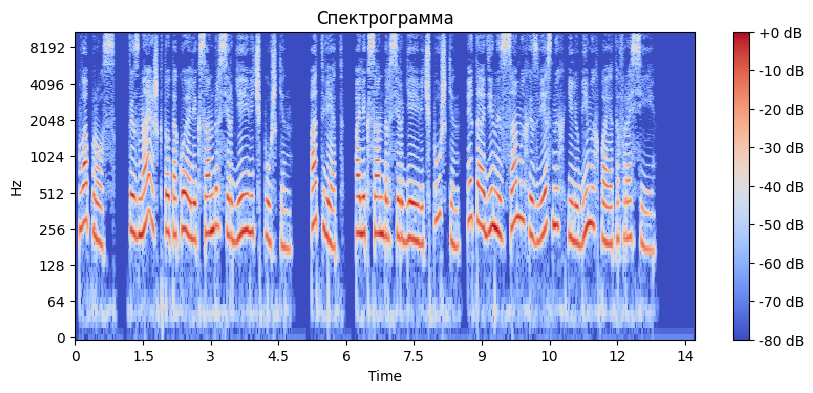

Обрабатывается файл: audio_commands/06.wav
Распознанная команда: Какие Времена года Ты знаешь
Сгенерированный ответ: Вопрос: Какие Времена года Ты знаешь
Ответ: В этом году я не буду писать о том, что я знаю.
Проигрывание сгенерированного голоса...


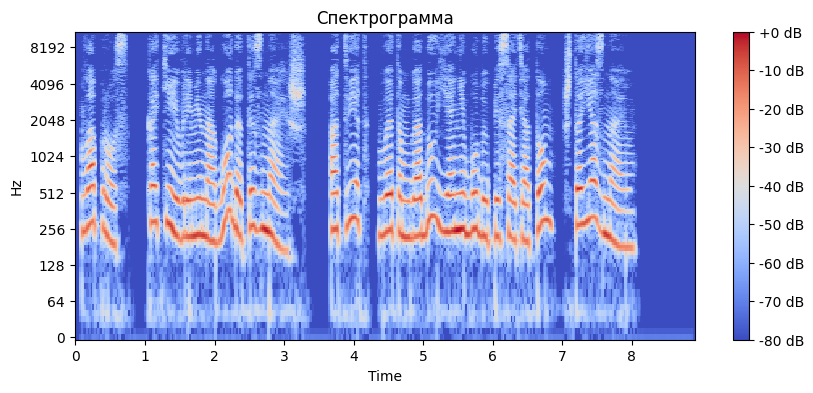

Обрабатывается файл: audio_commands/01.wav
Распознанная команда: Привет Как у тебя дела
Сгенерированный ответ: Вопрос: Привет Как у тебя дела
Ответ: Привет, как у тебя дела?
Проигрывание сгенерированного голоса...


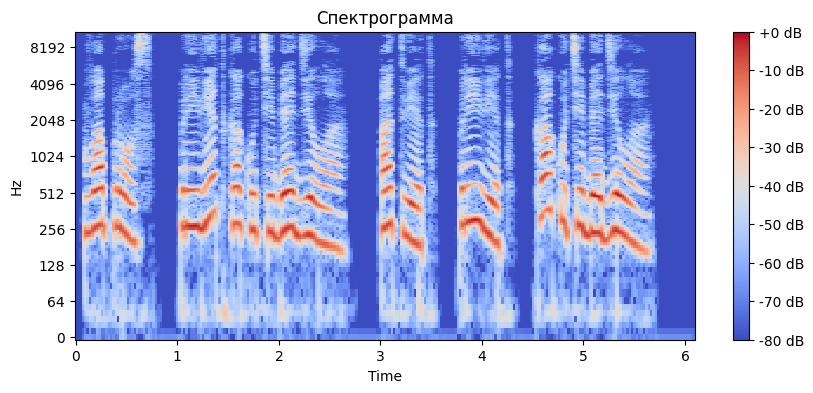

Обрабатывается файл: audio_commands/10.wav
Распознанная команда: Что такое авокадо
Сгенерированный ответ: Вопрос: Что такое авокадо
Ответ: Это очень вкусный и полезный фрукт.
Проигрывание сгенерированного голоса...


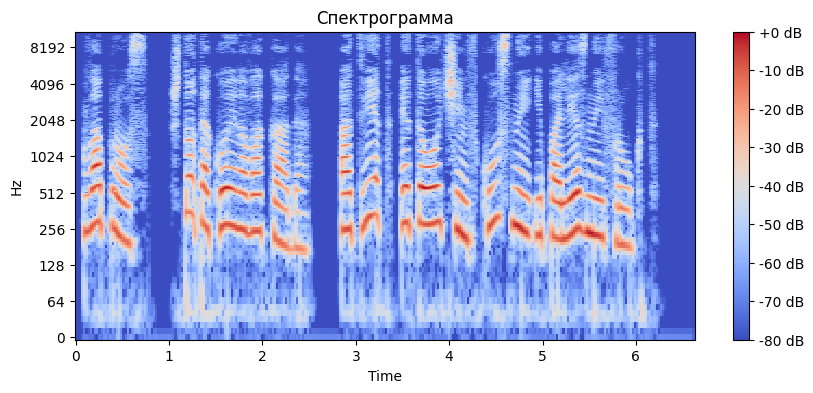

Обрабатывается файл: audio_commands/02.wav
Распознанная команда: Расскажи пожалуйста анекдот про прапорщика
Сгенерированный ответ: Вопрос: Расскажи пожалуйста анекдот про прапорщика
Ответ: - А что, есть анекдот про прапорщика?
Ответ: - Есть анекдот про прапорщика.
Ответ: - Есть анекдот про прапорщика.
Ответ: - Есть анекдот про прапорщика
Проигрывание сгенерированного голоса...


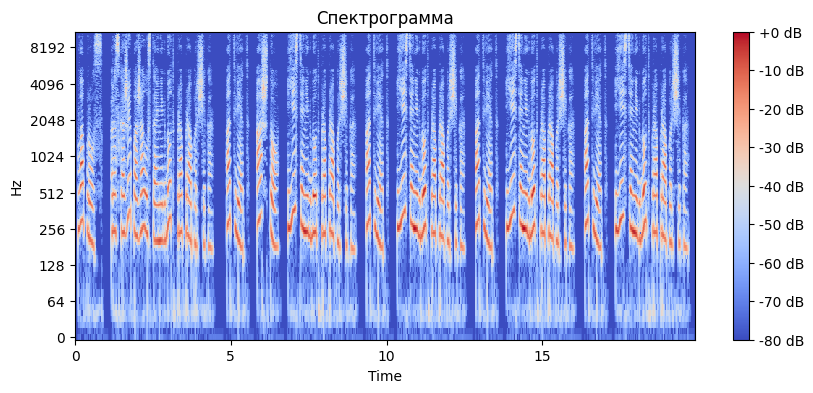

Обрабатывается файл: audio_commands/05.wav
Распознанная команда: какой прогноз погоды на завтра
Сгенерированный ответ: Вопрос: какой прогноз погоды на завтра
Ответ: сегодня будет солнечно, а завтра будет пасмурно.
Проигрывание сгенерированного голоса...


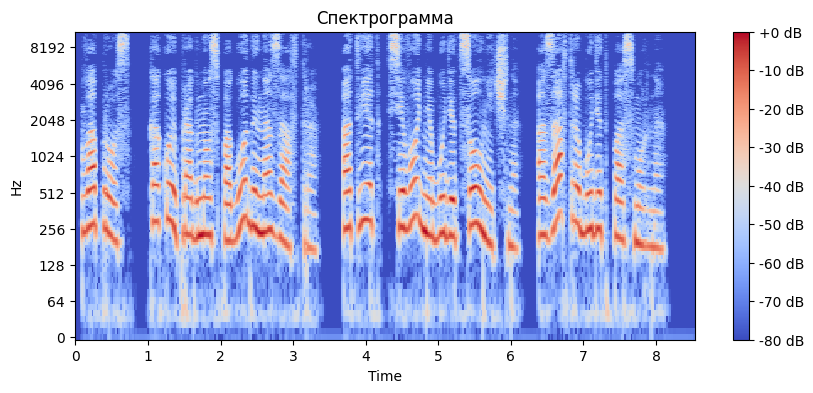

In [ ]:
# Основной цикл для обработки звуковых команд
for audio_file in audio_files:  # Перебор всех аудиофайлов
    print(f"Обрабатывается файл: {audio_file}")  # Сообщение о начале обработки
    user_command = recognize_speech_from_audio(audio_file)  # Распознаем речь из аудиофайла

    if user_command is None:  # Если не удалось распознать речь
        continue  # Пропустить итерацию

    # Генерация ответа на вопрос
    response = text_generation_model(f"Вопрос: {user_command}\nОтвет:", max_length=50, num_return_sequences=1)[0]['generated_text']  # Генерация текстового ответа

    # Вывод текста сгенерированного ответа
    print(f"Сгенерированный ответ: {response.strip()}")  # Вывод текста ответа

    # Синтез речи на основе ответа
    audio_file_response = text_to_speech(response.strip())  # Генерация аудиофайла из ответа

    # Воспроизведение сгенерированного голоса
    print("Проигрывание сгенерированного голоса...")  # Сообщение о начале воспроизведения
    display(ipd.Audio(audio_file_response))  # Проигрывание аудиофайла

    # Генерация и отображение спектрограммы для сгенерированного голоса
    plot_spectrogram(audio_file_response)  # Отображение спектрограммы